# Classification of MNIST dataset digits
## Labels = 10
## Training Samples =  60,000
## Testing Samples =   10,000

In [1]:
# Modules
import numpy as np
from keras.datasets import mnist
from sklearn import preprocessing
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
np.random.seed(123)  # for reproducibility

Using Theano backend.


In [13]:
# get data from Keras
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# normalize
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
#X_train /= 255
#X_test /= 255

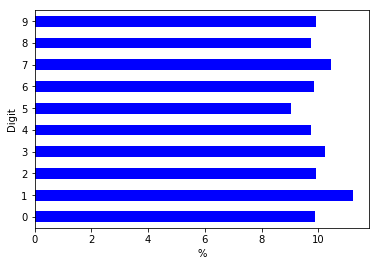

In [14]:
# % Percent of each digit relative to the data set
df = pd.DataFrame(Y_train, columns=['Digit'])
f = lambda x: 100 * x /len(df)
s = df['Digit'].value_counts().sort_index().apply(f).plot.barh(); plt.ylabel('Digit') ; plt.xlabel('%');

In [15]:
# prepare data for classification
# Note: I am transforming each 28*28 image into a 1 X 784 vector
X_train_matrix = np.zeros( (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test_matrix = np.zeros( (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

for idx, I in enumerate(X_train):
    X_train_matrix[idx,:] = I.flatten()
    
for idx, I in enumerate(X_test):
    X_test_matrix[idx,:] = I.flatten()

### Decision Tree Classifier

In [16]:
# Decision Tree Classifier
clasifier = tree.DecisionTreeClassifier()
clasifier = clasifier.fit(X_train_matrix, Y_train)
y_pred = clasifier.predict(X_test_matrix)

In [17]:
print("Classification Report:\n%s" % metrics.classification_report(Y_test, y_pred))

Classification Report:
             precision    recall  f1-score   support

          0       0.91      0.94      0.93       980
          1       0.95      0.96      0.95      1135
          2       0.87      0.85      0.86      1032
          3       0.83      0.85      0.84      1010
          4       0.87      0.88      0.88       982
          5       0.84      0.83      0.84       892
          6       0.90      0.89      0.90       958
          7       0.93      0.90      0.91      1028
          8       0.82      0.81      0.81       974
          9       0.86      0.86      0.86      1009

avg / total       0.88      0.88      0.88     10000



In [7]:
print("Cohen's Kappa score:\n%s" % metrics.cohen_kappa_score(Y_test, y_pred))

Cohen's Kappa score:
0.863945244008


In [8]:
print("Hamming Loss:\n%s" % metrics.hamming_loss(Y_test, y_pred))

Hamming Loss:
0.1224


### RandomForestClassifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10)
RFC = RFC.fit(X_train_matrix, Y_train)
y_pred = RFC.predict(X_test_matrix)

In [10]:
print("Classification Report:\n%s" % metrics.classification_report(Y_test, y_pred))

Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97       980
          1       0.97      0.99      0.98      1135
          2       0.92      0.94      0.93      1032
          3       0.92      0.93      0.93      1010
          4       0.95      0.95      0.95       982
          5       0.94      0.93      0.94       892
          6       0.97      0.96      0.96       958
          7       0.96      0.95      0.95      1028
          8       0.95      0.91      0.93       974
          9       0.94      0.92      0.93      1009

avg / total       0.95      0.95      0.95     10000



In [11]:
print("Cohen's Kappa score:\n%s" % metrics.cohen_kappa_score(Y_test, y_pred))

Cohen's Kappa score:
0.941085043861


In [12]:
print("Hamming Loss:\n%s" % metrics.hamming_loss(Y_test, y_pred))

Hamming Loss:
0.053
